```
Student-1
Name:Mir Shoaib Ahmed
ID:19-41772-3
```

```
Student-2
Name:Sidul Islam Sohag
ID:20-42668-1
```


*   Mount your google drive.

In [ ]:
# mount google drive if you are using Colab
# otherewise, leave it blank

# start writing your code here
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



*   Import necessary libraries.


In [ ]:
# load/import all required library

# start writing your code here
import pandas
import numpy
import matplotlib.pyplot
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Python Final Project/Salary.csv"
df = pd.read_csv(path)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Python Final Project/Salary.csv"
df = pd.read_csv(path)

print("Dataset Information:")
print(df.info())

df.fillna(df.median(), inplace=True)
df.drop_duplicates(inplace=True)

print("\nCleaned Dataset Statistics:")
print(df.describe())

print("\nFirst Few Rows of Cleaned Dataset:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB
None

Cleaned Dataset Statistics:
               Age  Education Level  Years of Experience         Salary  \
count  5148.000000      5148.000000          5148.000000    5148.000000   
mean     34.001166         1.640831             8.336636  114272.010878   


<ipython-input-3-949f6b6682f8>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

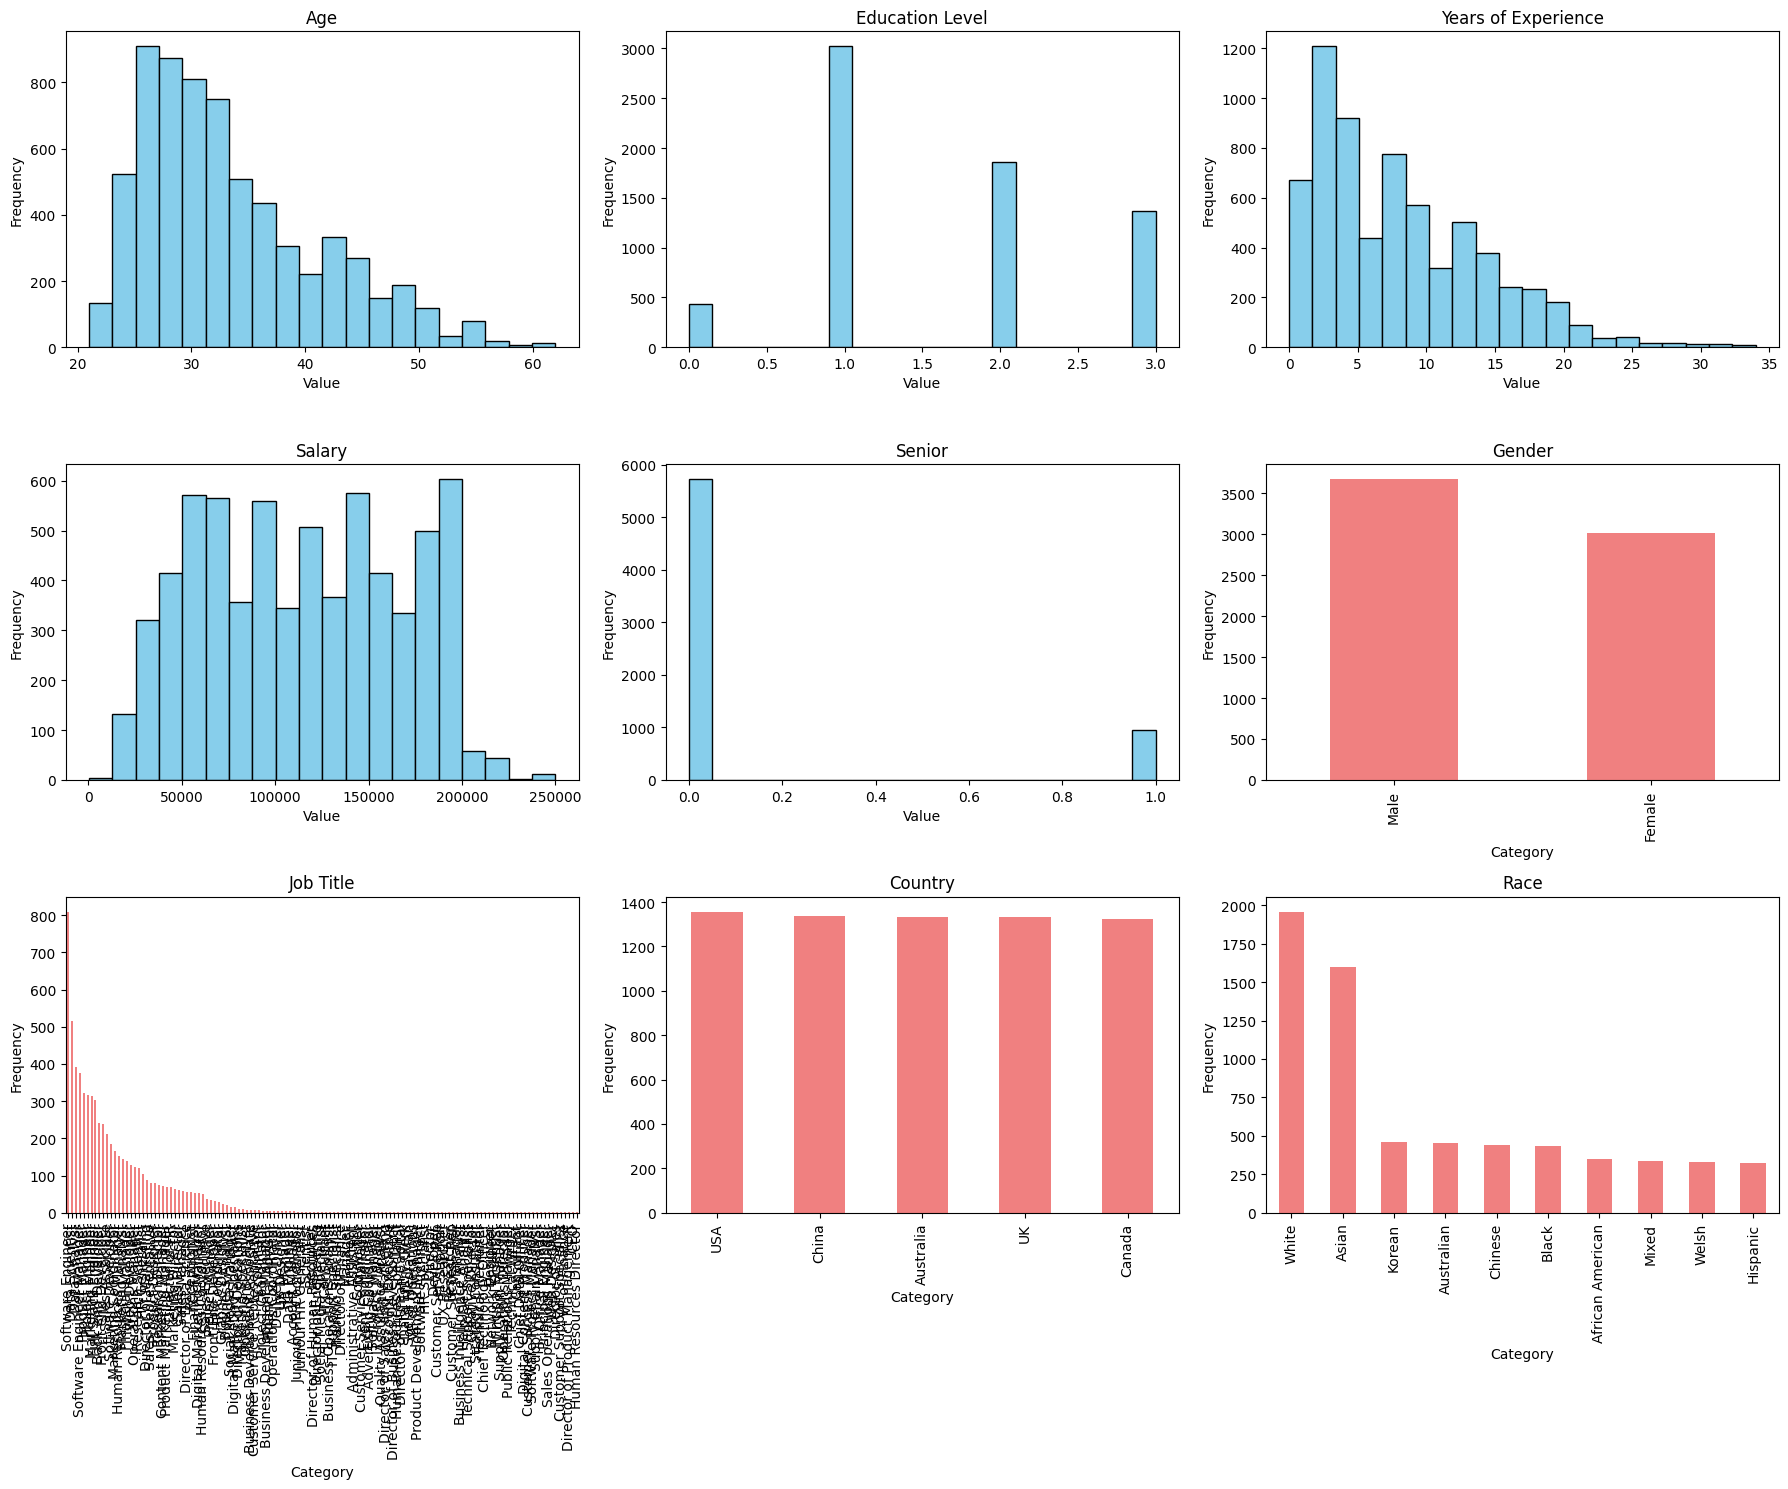

In [ ]:
# write task-3 solution

# start writing your code here
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Python Final Project/Salary.csv"
df = pd.read_csv(path)

categorical_columns = ['Gender', 'Job Title', 'Country', 'Race']
numerical_columns = ['Age', 'Education Level', 'Years of Experience', 'Salary', 'Senior']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i + len(numerical_columns)], color='lightcoral')
    axes[i + len(numerical_columns)].set_title(col)
    axes[i + len(numerical_columns)].set_xlabel('Category')
    axes[i + len(numerical_columns)].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

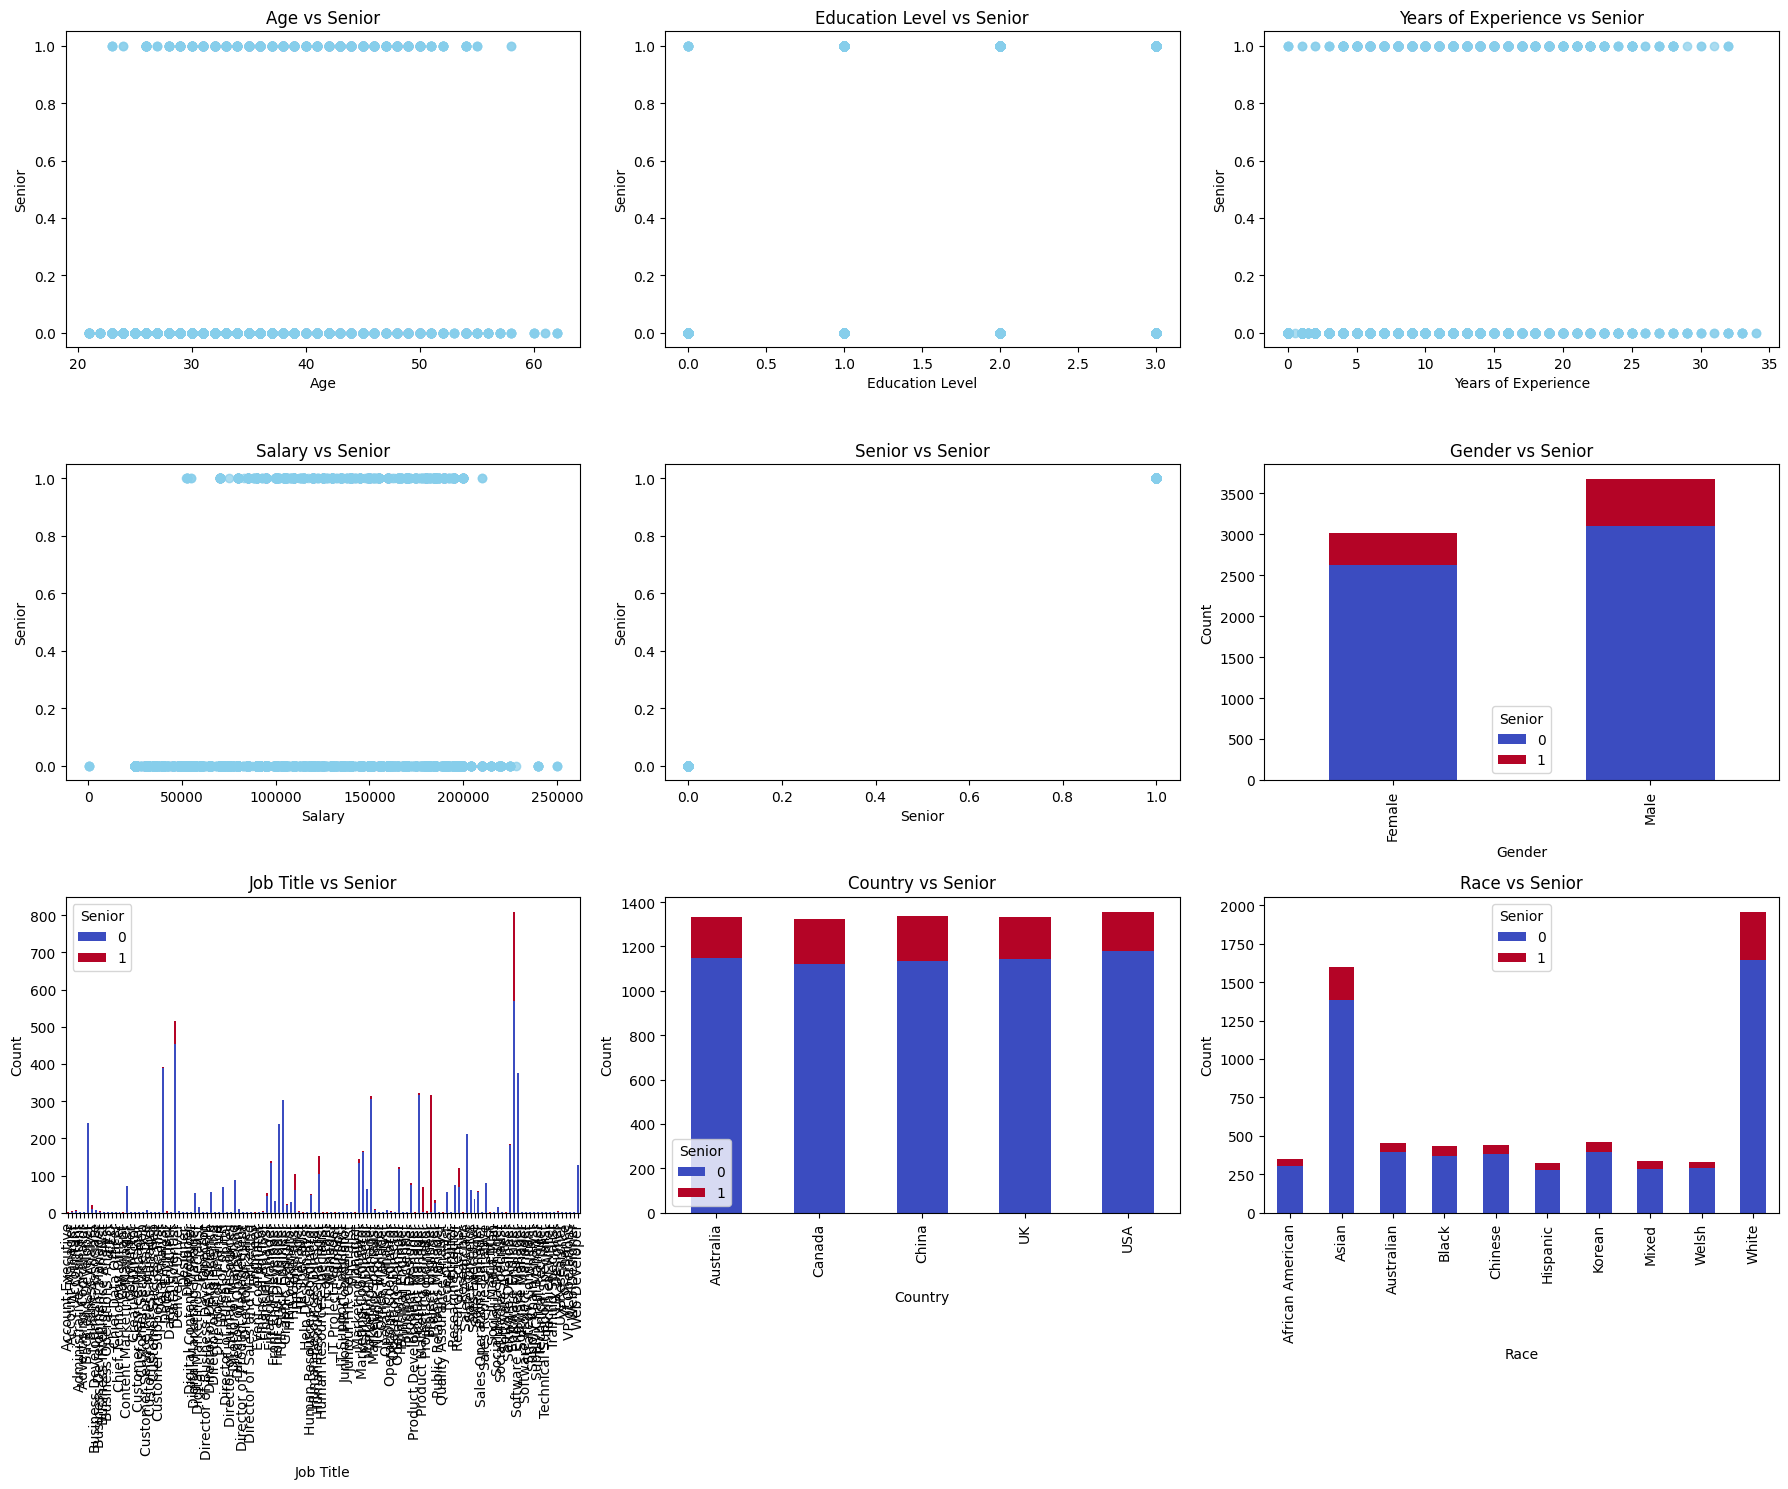

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Python Final Project/Salary.csv"
df = pd.read_csv(path)

categorical_columns = ['Gender', 'Job Title', 'Country', 'Race']
numerical_columns = ['Age', 'Education Level', 'Years of Experience', 'Salary', 'Senior']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].scatter(df[col], df['Senior'], color='skyblue', alpha=0.7)
    axes[i].set_title(f'{col} vs Senior')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Senior')

for i, col in enumerate(categorical_columns):
    df.groupby([col, 'Senior']).size().unstack().plot(kind='bar', stacked=True, ax=axes[i + len(numerical_columns)], colormap='coolwarm')
    axes[i + len(numerical_columns)].set_title(f'{col} vs Senior')
    axes[i + len(numerical_columns)].set_xlabel(col)
    axes[i + len(numerical_columns)].set_ylabel('Count')

plt.tight_layout()
plt.show()

•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

path = "/content/drive/MyDrive/Python Final Project/Salary.csv"
df = pd.read_csv(path)

categorical_columns = ['Gender', 'Job Title', 'Country', 'Race']
numerical_columns = ['Age', 'Education Level', 'Years of Experience', 'Salary']

X_categorical = df[categorical_columns].values
X_numerical = df[numerical_columns].values
Y = df['Senior'].values.reshape(-1, 1)
encoder = OneHotEncoder(drop='first', sparse=False)
X_categorical_encoded = encoder.fit_transform(X_categorical)
X = np.concatenate((X_categorical_encoded, X_numerical), axis=1)
Y = Y.astype(float)
scaler = StandardScaler()
X[:, -len(X_numerical[0]):] = scaler.fit_transform(X[:, -len(X_numerical[0]):])

print("Y:")
print(Y)
print("X:")
print(X)



Y:
[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
X:
[[ 1.          0.          0.         ... -0.70692421 -0.51049885
  -0.4792766 ]
 [ 0.          0.          0.         ...  0.42891267 -0.84223686
  -0.95273579]
 [ 1.          0.          0.         ...  1.56474954  1.14819123
   0.65702548]
 ...
 [ 0.          0.          0.         ... -0.70692421 -0.67636785
  -1.14211947]
 [ 1.          0.          0.         ...  0.42891267  0.98232222
   0.4676418 ]
 [ 0.          0.          0.         ... -1.84276108 -1.17397487
  -1.52088683]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 123 as the value of the random_state parameter of this function.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
path = "/content/drive/MyDrive/Python Final Project/Salary.csv"
df = pd.read_csv(path)

categorical_columns = ['Gender', 'Job Title', 'Country', 'Race']
numerical_columns = ['Age', 'Education Level', 'Years of Experience', 'Salary']

X = df.drop('Senior', axis=1)
y = df['Senior']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (5347, 8) (5347,)
Testing set shape (X, y): (1337, 8) (1337,)


•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

path = "/content/drive/MyDrive/Python Final Project/Salary.csv"
df = pd.read_csv(path)

X = df.drop(columns=['Senior'])
y = df['Senior']
categorical_columns = ['Gender', 'Job Title', 'Country', 'Race']
X_encoded = pd.get_dummies(X, columns=categorical_columns)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=123)
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

Confusion Matrix:
[[966 181]
 [112  78]]


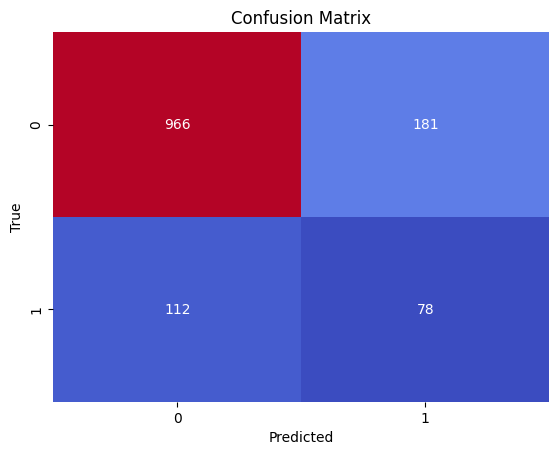

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = naive_bayes_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


•	**Task 9:** Calculate the accuracy, precision, recall and f-1 score of your model.

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB

path = "/content/drive/MyDrive/Python Final Project/Salary.csv"
df = pd.read_csv(path)

y_pred = naive_bayes_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7808526551982049

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1147
           1       0.30      0.41      0.35       190

    accuracy                           0.78      1337
   macro avg       0.60      0.63      0.61      1337
weighted avg       0.81      0.78      0.79      1337



•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

path = "/content/drive/MyDrive/Python Final Project/Salary.csv"
df = pd.read_csv(path)

categorical_columns = ['Gender', 'Job Title', 'Country', 'Race']
numerical_columns = ['Age', 'Education Level', 'Years of Experience', 'Salary']

X_categorical = df[categorical_columns].values
X_numerical = df[numerical_columns].values
Y = df['Senior'].values.reshape(-1, 1)
encoder = OneHotEncoder(drop='first', sparse=False)
X_categorical_encoded = encoder.fit_transform(X_categorical)
X = np.concatenate((X_categorical_encoded, X_numerical), axis=1)
Y = Y.astype(float)
scaler = StandardScaler()
X[:, -len(X_numerical[0]):] = scaler.fit_transform(X[:, -len(X_numerical[0]):])
naive_bayes_classifier = GaussianNB()
cross_val_results = cross_val_score(naive_bayes_classifier, X, Y.ravel(), cv=10, scoring='accuracy')

for i, accuracy in enumerate(cross_val_results, 1):
    print(f'Fold {i}: Accuracy = {accuracy:.4f}')

average_accuracy = cross_val_results.mean()
print(f'\nAverage Accuracy across 10 Folds: {average_accuracy:.4f}')




Fold 1: Accuracy = 0.3483
Fold 2: Accuracy = 0.2855
Fold 3: Accuracy = 1.0000
Fold 4: Accuracy = 0.7175
Fold 5: Accuracy = 0.6587
Fold 6: Accuracy = 0.2605
Fold 7: Accuracy = 0.3683
Fold 8: Accuracy = 0.4222
Fold 9: Accuracy = 0.2575
Fold 10: Accuracy = 0.5045

Average Accuracy across 10 Folds: 0.4823


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
